In [17]:
%matplotlib inline

import torch
import matplotlib.pyplot as plt
import numpy as np

device = None
if torch.cuda.is_available():
    # device = torch.device('cuda')
    device = torch.device('cpu')
else:
    device = torch.device('cpu')

# Observed/training input and output.
x_train = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]], device=device).reshape(-1, 2)
y_train = torch.tensor([[0.0], [1.0], [1.0], [0.0]], device=device).reshape(-1, 1)

class XorOperatorModel:
    def __init__(self):
        # Model variables
        # requires_grad enables calculation of gradients
        self.W1 = torch.tensor([[np.random.uniform(-1.0, 1.0), np.random.uniform(-1.0, 1.0)],
                                [np.random.uniform(-1.0, 1.0), np.random.uniform(-1.0, 1.0)]], device=device, requires_grad=True)
        self.W2 = torch.tensor([[np.random.uniform(-1.0, 1.0)], [np.random.uniform(-1.0, 1.0)]], device=device, requires_grad=True)
        self.b1 = torch.tensor([[np.random.uniform(-1.0, 1.0), np.random.uniform(-1.0, 1.0)]], device=device, requires_grad=True)
        self.b2 = torch.tensor([[np.random.uniform(-1.0, 1.0)]], device=device, requires_grad=True)

    # First layer function
    def f1(self, x):
        return torch.sigmoid(x @ self.W1 + self.b1)

    # Second layer function
    def f2(self, h):
        return torch.sigmoid(h @ self.W2 + self.b2)

    # Predictor
    def f(self, x):
        return self.f2(self.f1(x))

    # Uses Cross Entropy
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy(self.f(x), y)



In [18]:
model = XorOperatorModel()

# Optimize: adjust W and b to minimize loss using stochastic gradient descent
optimizer = torch.optim.SGD([model.b1, model.b2, model.W1, model.W2], lr=1)
for epoch in range(50_000):
    model.loss(x_train, y_train).backward()  # Compute loss gradients
    optimizer.step()    # Perform optimization by adjusting W and b
    optimizer.zero_grad()  # Clear gradients for next step


/pytorch/aten/src/ATen/native/cuda/Loss.cu:111: operator(): block: [0,0,0], thread: [0,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/pytorch/aten/src/ATen/native/cuda/Loss.cu:111: operator(): block: [0,0,0], thread: [1,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/pytorch/aten/src/ATen/native/cuda/Loss.cu:111: operator(): block: [0,0,0], thread: [2,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/pytorch/aten/src/ATen/native/cuda/Loss.cu:111: operator(): block: [0,0,0], thread: [3,0,0] Assertion `input_val >= zero && input_val <= one` failed.


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

W1 = tensor([[-8.3532,  8.2419],
        [ 8.0595, -8.5077]], requires_grad=True), W2 = tensor([[18.0142],
        [17.9799]], requires_grad=True), b1 = tensor([[-4.3201, -4.4184]], requires_grad=True), b2 = tensor([[-8.8902]], requires_grad=True), loss = 0.00018529841327108443


/tmp/ipykernel_712/467609760.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/home/olros/.local/lib/python3.9/site-packages/mpl_toolkits/mplot3d/proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([xs, ys, zs, np.ones_like(xs)])


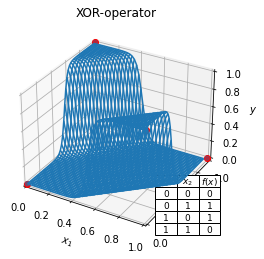

In [ ]:
print(f'W1 = {model.W1}, W2 = {model.W2}, b1 = {model.b1}, b2 = {model.b2}, loss = {model.loss(x_train.reshape(-1, 2), y_train)}')

fig = plt.figure('Oppgave C')
ax = fig.gca(projection='3d')
plt.title('XOR-operator')
# set axes limits, labels and create a table of the XOR
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.table(cellText=[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]],
          colWidths=[0.1] * 3,
          colLabels=["$x_1$", "$x_2$", "$f(x)$"],
          cellLoc="center",
          loc="lower right")

ax.plot(x_train[:, 0].squeeze(),
          x_train[:, 1].squeeze(),
          y_train[:, 0].squeeze(),
          'o',
          color="red")

x1 = np.arange(0, 1, 0.02)  # Set x1-values on the grid
x2 = np.arange(0, 1, 0.02)  # Set x2-values on the grid
# Calculate y-axis values
y = np.empty([len(x1), len(x2)], dtype=np.double)
for t in range(len(x1)):
    for r in range(len(x2)):
        y[t, r] = float(model.f(torch.tensor([float(x1[t]), float(x2[r])])))

x1, x2 = np.meshgrid(x1, x2)  # Create meshgrid
surf = ax.plot_wireframe(x1, x2, np.array(y))  # Plots the wireframe

# Scatter/plot the points for f(x1, x2) in x_train
xer = [float(x[0]) for x in x_train]
yer = [float(x[1]) for x in x_train]
ax.scatter(xer, yer, y_train)

float(model.f(torch.tensor([1.0, 0.0])))

plt.show()